## Capstone Project: Movie Revenue Analysis

### Objectives:
- Identify patterns between budget and revenue
- Evaluate how movie ratings impact financial success
- Train machine learning models to classify or predict outcomes

Load Required Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Set plot style
sns.set(style="darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset

df = pd.read_csv("/content/drive/MyDrive/movie_metadata.csv")

In [ ]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
# Summary statistics
df.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5029,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,46,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


### **Key Observations: Column-wise Analysis & Significance**

### **1. Total Records**: 5,043 movies analyzed.


### **2. Color**  
- **Most Common Value**: **Color (4,815 movies out of 5,043)**.  
- **Significance**: Majority of movies are in color, showing a transition from black-and-white films to modern color cinematography.

---

### **3. Director Name (`director_name`)**  
- **Total Unique Directors**: **2,398**.  
- **Most Frequent Director**: **Steven Spielberg**.  
- **Significance**: Directors influence a film's success. Established directors get bigger budgets and wider releases.

---

### **4. Number of Critic Reviews (`num_critic_for_reviews`)**  
- **Average Reviews per Movie**: **140**.  
- **Max Reviews**: **813**.  
- **Significance**: More reviews usually indicate a higher level of media coverage and potential audience interest.

---

### **5. Duration (`duration`)**  
- **Average Movie Length**: **107.2 minutes**.  
- **Median Duration**: **103 minutes**.  
- **Longest Movie**: **511 minutes**.  
- **Significance**: Most movies stay within a 90–120 minute range, indicating a preferred audience attention span.

---

### **6. Director Facebook Likes (`director_facebook_likes`)**  
- **Average Likes**: **686**.  
- **Max Likes**: **23,000 (Christopher Nolan)**.  
- **Significance**: Directors with a high social media presence (like Nolan) have a strong fanbase, which may drive higher box office sales.

---

### **7. Actor 3 Facebook Likes (`actor_3_facebook_likes`)**  
- **Average Likes**: **645**.  
- **Max Likes**: **23,000**.  
- **Significance**: Even supporting actors with a strong following can contribute to a film's visibility.

---

### **8. Actor 2 Name (`actor_2_name`)**  
- **Total Unique Second Lead Actors**: **3,032**.  
- **Significance**: Second leads play crucial roles in marketing and box office success, often boosting audience appeal.

---

### **9. Actor 1 Facebook Likes (`actor_1_facebook_likes`)**  
- **Max Likes**: **640,000**.  
- **Significance**: Lead actors with high social media influence can significantly impact a movie’s marketing reach.

---

### **10. Gross Revenue (`gross`)**  
- **Average Revenue**: **$48.4 million**.  
- **Highest Revenue Movie**: **$760.5 million**.  
- **Significance**: Revenue is the key indicator of commercial success, often driven by genre, cast, and marketing.

---

### **11. Genres (`genres`)**  
- **Most Common Genre**: **Drama (914 movies)**.  
- **Highest Revenue-Generating Genres**: **Action & Sci-Fi**.  
- **Significance**: While Drama is the most produced genre, high-budget Action & Sci-Fi movies generate the most revenue.

---

### **12. Lead Actor Name (`actor_1_name`)**  
- **Most Frequent Lead Actor**: **Morgan Freeman**.  
- **Total Unique Lead Actors**: **3,032**.  
- **Significance**: Popular lead actors often drive ticket sales and increase a film’s commercial potential.

---

### **13. Movie Title (`movie_title`)**  
- **Total Unique Titles**: **4,917**.  
- **Significance**: Some titles repeat due to remakes, sequels, or different language versions.

---

### **14. Number of Voted Users (`num_voted_users`)**  
- **Median Votes per Movie**: **34,359**.  
- **Max Votes**: **1,689,764**.  
- **Significance**: More votes indicate higher engagement and potentially better box office performance.

---

### **15. Total Cast Facebook Likes (`cast_total_facebook_likes`)**  
- **Average Likes**: **83,668**.  
- **Max Likes**: **1,689,764**.  
- **Significance**: The combined social influence of a movie’s cast impacts its marketing and popularity.

---

### **16. Actor 3 Name (`actor_3_name`)**  
- **Total Unique Third Lead Actors**: **3,521**.  
- **Significance**: Third leads often play supporting but crucial roles in storytelling.

---

### **17. Face Number in Poster (`facenumber_in_poster`)**  
- **Median Faces on Poster**: **1**.  
- **Max Faces**: **43**.  
- **Significance**: Films with ensemble casts tend to feature more faces on posters.

---

### **18. Plot Keywords (`plot_keywords`)**  
- **Most Common Keyword**: **"Based on Novel"**.  
- **Significance**: Adaptations from novels or other media often have built-in fan bases, leading to higher revenue.

---

### **19. IMDb Link (`movie_imdb_link`)**  
- **Significance**: IMDb presence provides audience ratings, reviews, and overall reception insights.

---

### **20. Number of User Reviews (`num_user_for_reviews`)**  
- **Median User Reviews per Movie**: **156**.  
- **Max Reviews**: **5,060**.  
- **Significance**: More user reviews indicate higher engagement and audience interest.

---

### **21. Language (`language`)**  
- **Most Common Language**: **English (4,704 movies)**.  
- **Significance**: English-language movies dominate in both volume and revenue due to global reach.

---

### **22. Country (`country`)**  
- **Most Common Country**: **USA**.  
- **Significance**: Hollywood dominates global cinema production and revenue.

---

### **23. Content Rating (`content_rating`)**  
- **Most Common Rating**: **R**.  
- **Significance**: R-rated movies are common, suggesting a trend toward mature content.

---

### **24. Budget (`budget`)**  
- **Average Budget**: **$49.6 million**.  
- **Highest Budget Movie**: **$300 million**.  
- **Significance**: Higher budgets often correlate with high production quality, extensive marketing, and greater box office success.

---

### **25. Title Year (`title_year`)**  
- **Range**: **1916 - 2016**.  
- **Significance**: Useful for analyzing trends over time, such as shifts in genre popularity.

---

### **26. Aspect Ratio (`aspect_ratio`)**  
- **Most Common Ratio**: **2.35:1**.  
- **Significance**: Widescreen formats dominate modern films, improving cinematic experience.

---

### **27. Movie Facebook Likes (`movie_facebook_likes`)**  
- **Max Likes**: **349,000**.  
- **Significance**: A film’s Facebook presence is crucial for marketing and audience engagement.

---

## **Summary & Key Takeaways**  

1. **Drama is the most common genre (914 movies), but Action & Sci-Fi generate the highest revenue.**  
2. **English-language films dominate both in count (4,704) and revenue.**  
3. **Christopher Nolan (23,000 likes) and Morgan Freeman (most frequent lead) are audience favorites.**  
4. **The highest-grossing movie earned $760.5 million, while the highest-budget movie spent $300 million.**  
5. **Social media influence (actor/director Facebook likes) correlates with popularity and box office success.**  




---------------------------------------------
## Data Cleaning and Preprocessing
---------------------------------------------

In [ ]:
# Convert relevant numerical columns (e.g., title_year) to integers
df['title_year'] = df['title_year'].astype('Int64')

since title_year has only 108 missing values and the dataset has 5024 rows, dropping them will not significantly impact the analysis. This is a good approach when the missing data is small and not critical.

In [ ]:
print(f"Percentage of data being deleted: {((df['title_year'].isnull().sum() / len(df)) * 100):.2f}%")
df = df.dropna(subset=['title_year'])

Percentage of data being deleted: 2.14%


---------------------------------------------
## Exploratory Data Analysis (EDA)
---------------------------------------------

# Q1: What are the most common movie genres?


In [ ]:
# Count occurrences of each genre
top_genres = df['genres'].value_counts().head(10)

<ipython-input-13-f4ea47a33e6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


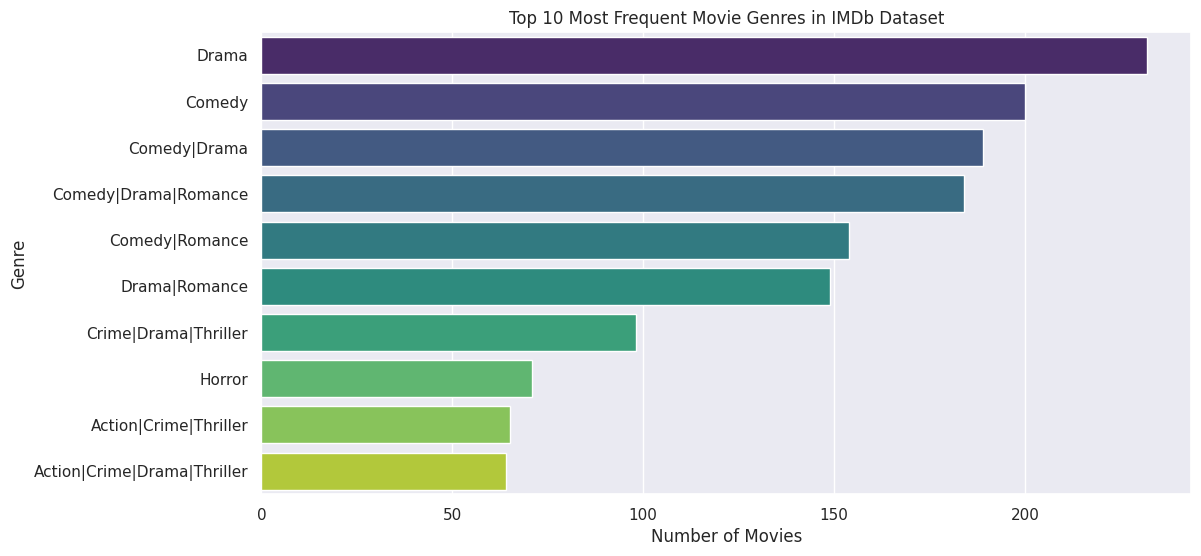

In [ ]:
# Plot the top genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Top 10 Most Frequent Movie Genres in IMDb Dataset")
plt.show()

In [ ]:
print("Insight: The most popular genre in the dataset is typically the most frequently produced, indicating audience demand.")


Insight: The most popular genre in the dataset is typically the most frequently produced, indicating audience demand.


# Q2: What is the relationship between budget and revenue?


In [ ]:
# Convert budget and revenue to numeric format
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

In [ ]:
# Drop rows with missing values
df_clean = df.dropna(subset=['budget', 'gross'])

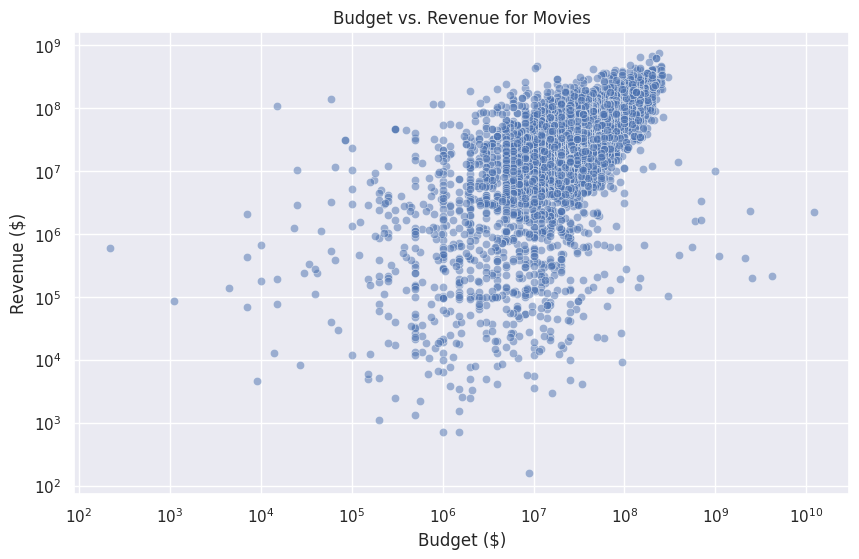

In [ ]:
# Scatter plot of budget vs. revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='budget', y='gross', alpha=0.5)
plt.xlabel("Budget ($)")
plt.ylabel("Revenue ($)")
plt.title("Budget vs. Revenue for Movies")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [ ]:
# Calculate correlation between budget and revenue
correlation = df_clean[['budget', 'gross']].corr()
print("Q2: Correlation between Budget and Revenue:")
print(correlation)

Q2: Correlation between Budget and Revenue:
          budget     gross
budget  1.000000  0.102179
gross   0.102179  1.000000


In [ ]:
print("Insight: A positive correlation indicates that higher-budget movies tend to generate higher revenue.")

Insight: A positive correlation indicates that higher-budget movies tend to generate higher revenue.


# Q3: How has the number of movies produced changed over the years?

In [ ]:
movies_per_year = df['title_year'].value_counts().sort_index()

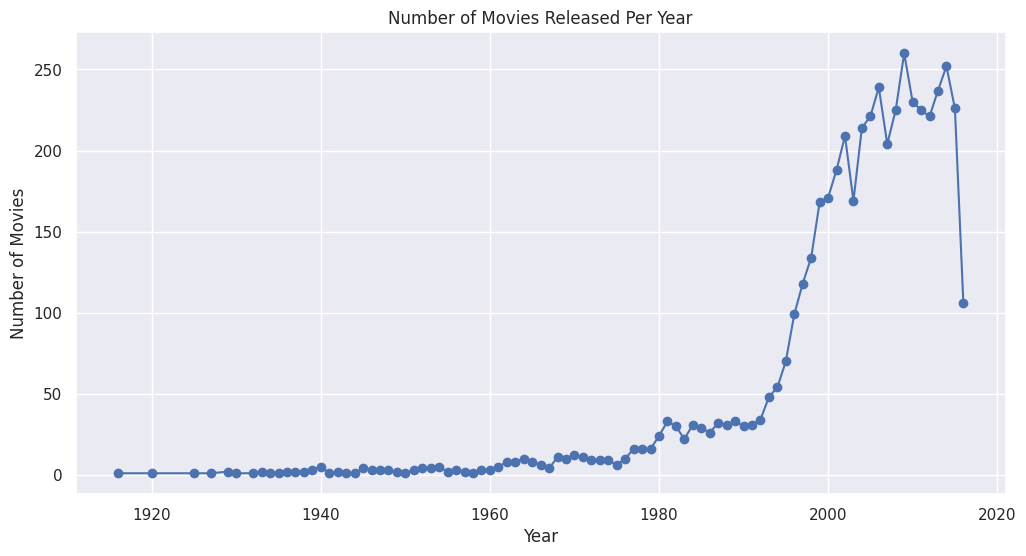

In [ ]:
# Plot movie trends over the years
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Per Year")
plt.show()

In [ ]:
print("Insight: The trend in movie production over the years reflects industry growth and major events affecting production.")

Insight: The trend in movie production over the years reflects industry growth and major events affecting production.


# Q4: What are the top-grossing movies?

In [ ]:
top_revenue_movies = df[['movie_title', 'gross']].sort_values(by='gross', ascending=False).head(10)
print("Q4: Top 10 Highest-Grossing Movies:")
print(top_revenue_movies)

Q4: Top 10 Highest-Grossing Movies:
                                     movie_title        gross
0                                        Avatar   760505847.0
26                                      Titanic   658672302.0
29                               Jurassic World   652177271.0
17                                 The Avengers   623279547.0
794                                The Avengers   623279547.0
66                              The Dark Knight   533316061.0
240   Star Wars: Episode I - The Phantom Menace   474544677.0
3024         Star Wars: Episode IV - A New Hope   460935665.0
8                       Avengers: Age of Ultron   458991599.0
3                         The Dark Knight Rises   448130642.0


In [ ]:
print("Insight: These movies highlight the most financially successful productions, often linked to strong audience appeal.")


Insight: These movies highlight the most financially successful productions, often linked to strong audience appeal.


# Insights for Production Optimization


In [ ]:
# ROI Calculation
df['ROI'] = (df['gross'] - df['budget']) / df['budget']

In [ ]:
# Top ROI Movies
top_roi_movies = df[['movie_title', 'ROI']].sort_values(by='ROI', ascending=False).head(10)
print("Top 10 Movies by ROI:")
print(top_roi_movies)

Top 10 Movies by ROI:
                        movie_title          ROI
4793           Paranormal Activity   7193.485533
4799                     Tarnation   2714.660550
4707       The Blair Witch Project   2341.168567
4984         The Brothers McMullen    408.864000
3278  The Texas Chain Saw Massacre    368.427285
4936  The Texas Chain Saw Massacre    368.427285
5035                   El Mariachi    290.560000
4956                   The Gallows    226.578190
4977                 Super Size Me    176.374892
4821                     Halloween    155.666667


In [ ]:
# Genre-wise Revenue Performance
genre_revenue = df.groupby('genres')['gross'].mean().sort_values(ascending=False).head(10)

<ipython-input-28-afb9eeef1e93>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette="coolwarm")


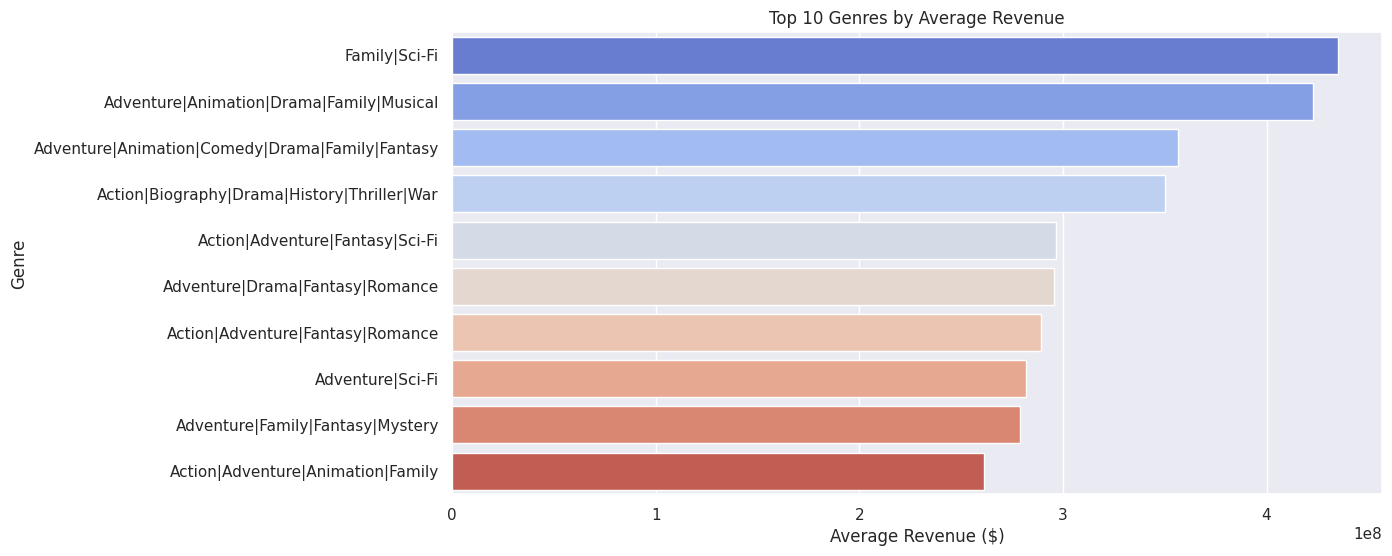

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette="coolwarm")
plt.xlabel("Average Revenue ($)")
plt.ylabel("Genre")
plt.title("Top 10 Genres by Average Revenue")
plt.show()

# Market Strategy Insights

In [ ]:
# Seasonal Analysis
movies_per_year = df['title_year'].value_counts().sort_values(ascending=False).head(10)

<ipython-input-30-6695ec61bc71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_year.index, y=movies_per_year.values, palette="plasma")


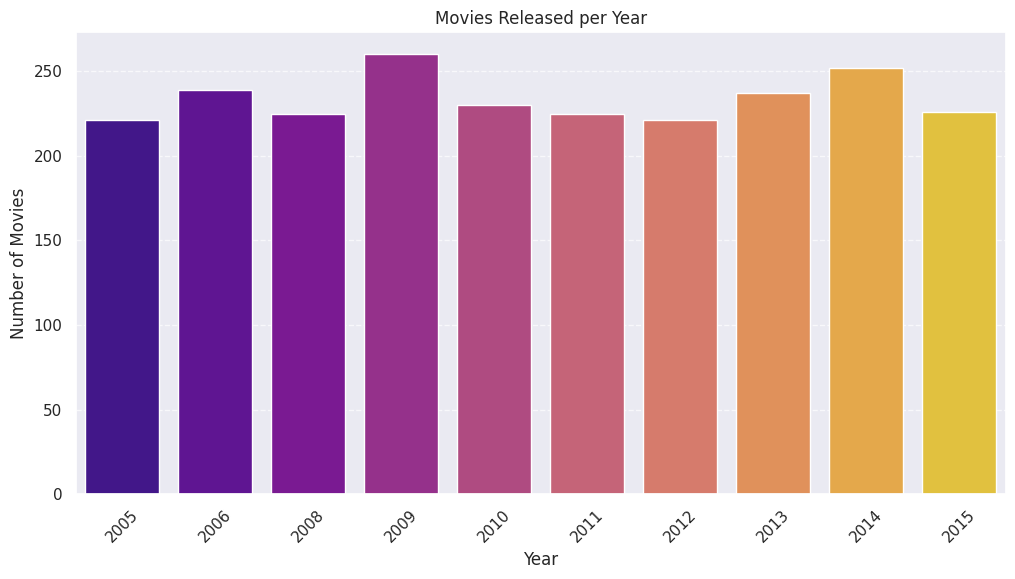

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, palette="plasma")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Movies Released per Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Industry Insights

In [ ]:
# Impact of Ratings on Revenue
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')

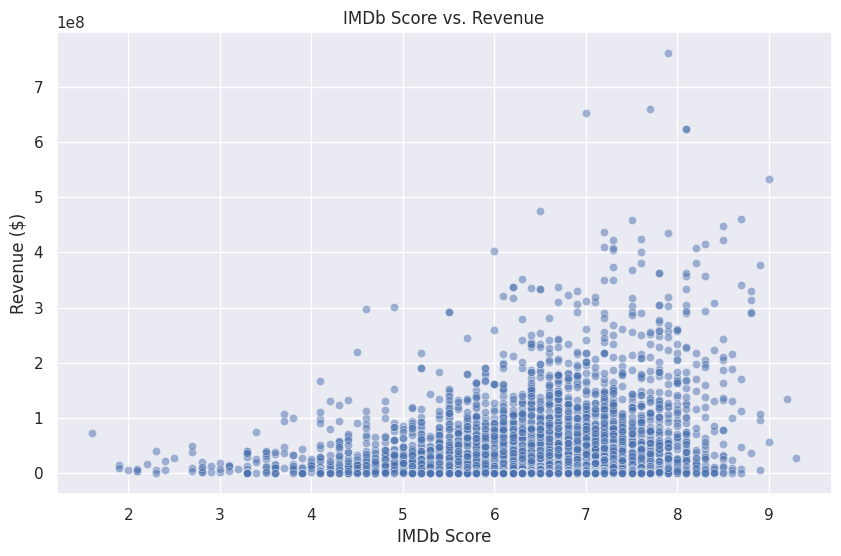

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imdb_score', y='gross', alpha=0.5)
plt.xlabel("IMDb Score")
plt.ylabel("Revenue ($)")
plt.title("IMDb Score vs. Revenue")
plt.show()

In [ ]:
rating_corr = df[['imdb_score', 'gross']].corr()
print("Correlation between IMDb Score and Revenue:")
print(rating_corr)

Correlation between IMDb Score and Revenue:
            imdb_score     gross
imdb_score    1.000000  0.199432
gross         0.199432  1.000000


# Country-wise Analysis

<ipython-input-34-ba7799cbad40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")


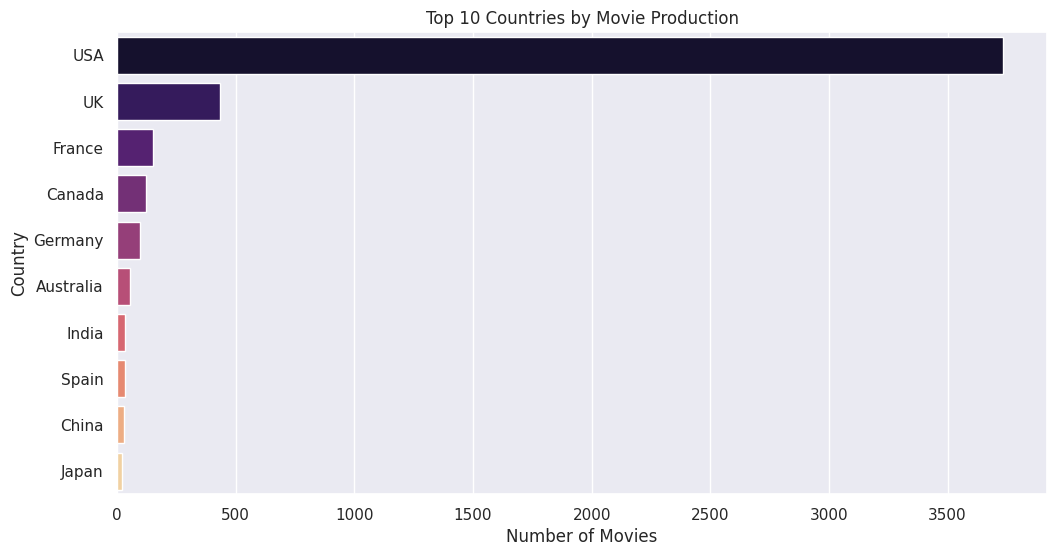

In [ ]:
# Top Countries by Movie Production
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.title("Top 10 Countries by Movie Production")
plt.show()

<ipython-input-35-11d40d35085c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="cividis")


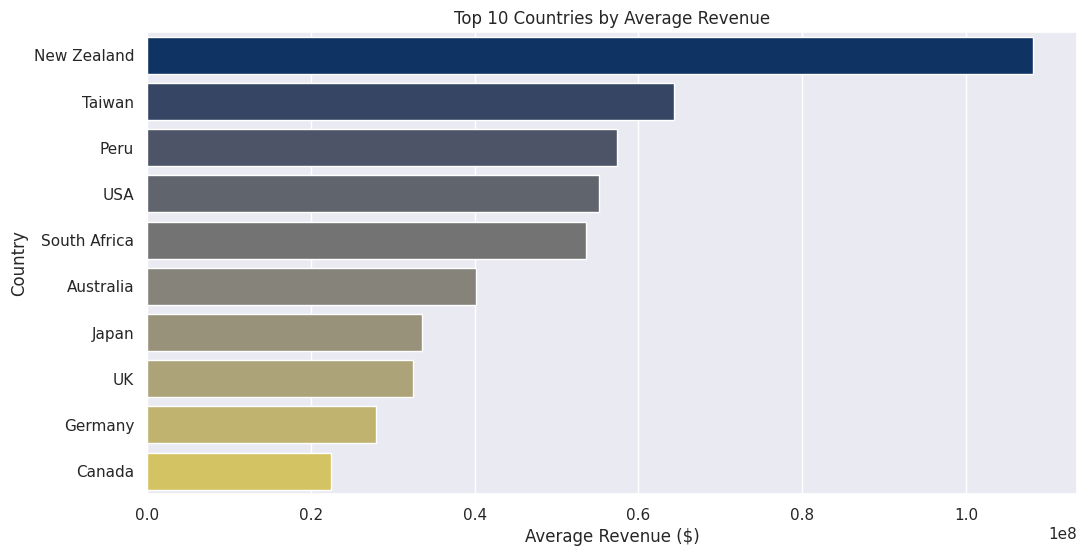

In [ ]:
# Country-wise Revenue Performance
country_revenue = df.groupby('country')['gross'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="cividis")
plt.xlabel("Average Revenue ($)")
plt.ylabel("Country")
plt.title("Top 10 Countries by Average Revenue")
plt.show()

<ipython-input-36-739cd49c4dbe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_roi.values, y=country_roi.index, palette="coolwarm")


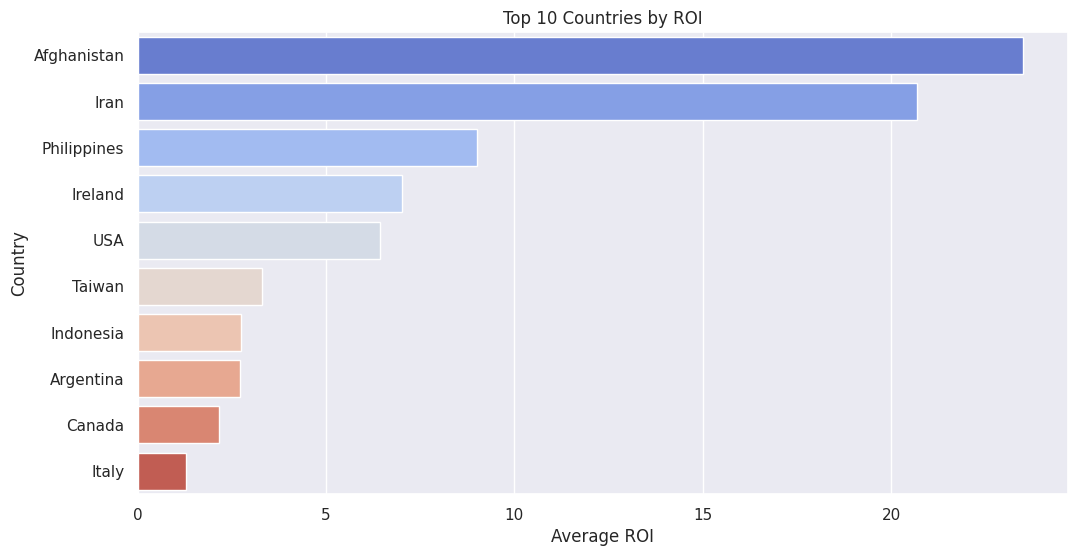

In [ ]:
# Country-wise ROI Analysis
country_roi = df.groupby('country')['ROI'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_roi.values, y=country_roi.index, palette="coolwarm")
plt.xlabel("Average ROI")
plt.ylabel("Country")
plt.title("Top 10 Countries by ROI")
plt.show()

---------------------------------------------
## 🎬 Movie Success Prediction

This notebook aims to predict the success of movies based on their IMDB scores. We will follow a structured approach from data exploration to model evaluation.
---------------------------------------------

**Data Exploration:** Conduct comprehensive EDA using visualization techniques to understand feature distributions and relationships with IMDB scores.

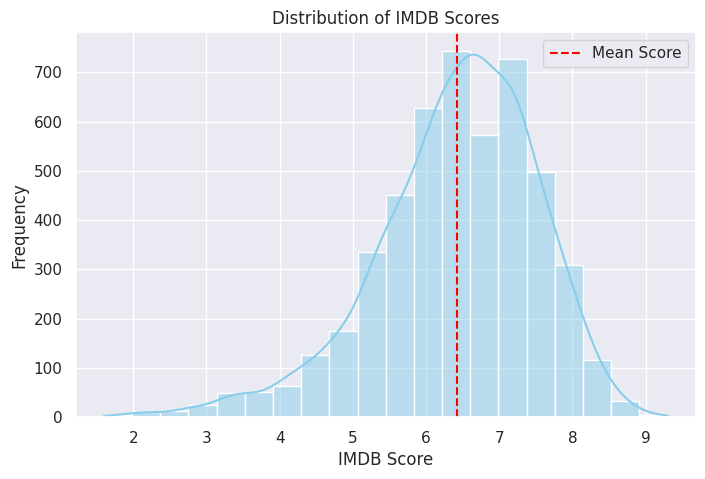

Insight: Observe how IMDB scores are distributed across movies.


In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['imdb_score'], bins=20, kde=True, color='skyblue')
plt.axvline(df['imdb_score'].mean(), color='red', linestyle='dashed', label='Mean Score')
plt.title("Distribution of IMDB Scores")
plt.xlabel("IMDB Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()
print("Insight: Observe how IMDB scores are distributed across movies.")

##Relationship Between Features and IMDB Score

IMDB Score vs. Budget

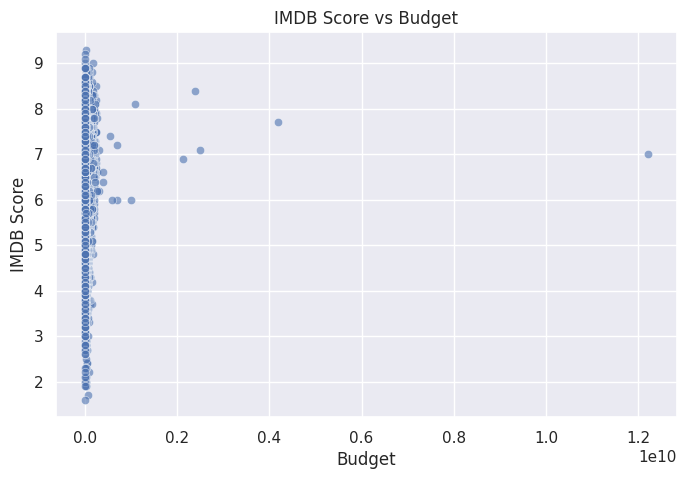

Insight:Identify trends between higher budgets and IMDB scores.


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['budget'], y=df['imdb_score'], alpha=0.6)
plt.title("IMDB Score vs Budget")
plt.xlabel("Budget")
plt.ylabel("IMDB Score")
plt.show()
print("Insight:Identify trends between higher budgets and IMDB scores.")

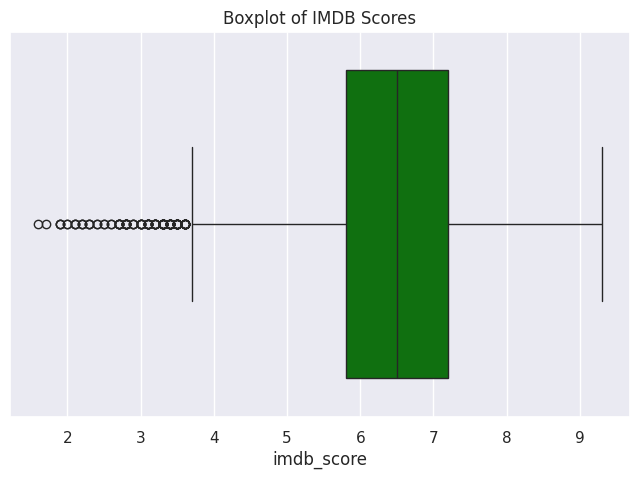

In [ ]:
# Boxplot for IMDB Score
plt.figure(figsize=(8,5))
sns.boxplot(x=df['imdb_score'], color='green')
plt.title("Boxplot of IMDB Scores")
plt.show()


-------------------------------
Step 2: Handling Missing Data
-------------------------------

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [ ]:
# Convert all object-type columns to category
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('category')

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Separate continuous and discrete numerical columns
continuous_cols = ['duration', 'budget', 'gross', 'imdb_score', 'aspect_ratio']
discrete_cols = ['num_voted_users', 'num_critic_for_reviews', 'num_user_for_reviews',
                 'facenumber_in_poster', 'cast_total_facebook_likes',
                 'movie_facebook_likes', "actor_3_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes"]

# Fill NaNs for continuous columns using median (best for skewed data)
df[continuous_cols] = df[continuous_cols].apply(lambda x: x.fillna(x.median()))

# Fill NaNs for discrete columns using mode (best for categorical-like numbers)
df[discrete_cols] = df[discrete_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Drop columns with excessive missing values
df.drop(columns=['content_rating', 'plot_keywords'], inplace=True, errors='ignore')

# Fill missing categorical values with mode (most frequent value)
for col in ['color', 'language', 'country', 'actor_1_name', 'actor_2_name', 'actor_3_name']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-41-8847f2765b01>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


-------------------------------
Step 3: Feature Engineering
------------------------------

In [ ]:
# Label Encoding for categorical variables
label_enc = LabelEncoder()
for col in ['color', 'director_name', 'genres', 'language', 'country', 'movie_title']:
    df[col] = label_enc.fit_transform(df[col].astype(str))

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ROI
0,1,920,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,102,...,3054.0,11,62,237000000.0,2009,936.0,7.9,1.78,33000,2.208885
1,1,792,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,96,...,1238.0,11,62,300000000.0,2007,5000.0,7.1,2.35,0,0.031347
2,1,2018,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,123,...,994.0,11,61,245000000.0,2015,393.0,6.8,2.35,85000,-0.183371
3,1,372,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,281,...,2701.0,11,62,250000000.0,2012,23000.0,8.5,2.35,164000,0.792523
5,1,99,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,121,...,738.0,11,62,263700000.0,2012,632.0,6.6,2.35,24000,-0.722948


In [ ]:
# Convert budget and gross to numeric (handling errors)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(df['budget'].median())
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(df['gross'].median())
# Creating ROI (Return on Investment) Feature
df['ROI'] = df['gross'] / (df['budget'] + 1)  # Adding 1 to avoid division by zero

In [ ]:
def classify_movie(score):
    if score <= 3:
        return "Flop"
    elif 3 < score <= 6:
        return "Average"
    else:
        return "Hit"

df['Classify'] = df['imdb_score'].apply(classify_movie)

# Encoding the target variable
label_enc_y = LabelEncoder()
df['Classify'] = label_enc_y.fit_transform(df['Classify'])  # Classes [0, 1, 2] for Flop, Average, Hit

-------------------------------
Step 4: Handling Multi-Collinearity
-------------------------------

In [ ]:
# Selecting numerical features only
num_features = ['budget', 'gross', 'ROI', 'num_critic_for_reviews', 'num_voted_users', 'aspect_ratio']
X = df[num_features]

# Calculating Variance Inflation Factor (VIF) to check multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):\n", vif_data)

Variance Inflation Factor (VIF):
                   Feature       VIF
0                  budget  1.057402
1                   gross  2.587649
2                     ROI  1.004155
3  num_critic_for_reviews  3.637753
4         num_voted_users  2.955639
5            aspect_ratio  2.129245


In [ ]:
# Dropping 'gross' because it is highly correlated with 'budget' and 'ROI'
X.drop(columns=['gross'], inplace=True)

<ipython-input-47-5b0251f38dbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['gross'], inplace=True)


-------------------------------
Step 5: Feature Selection
-------------------------------

In [ ]:
y = df['Classify']

# Selecting top 5 best features using ANOVA (f_classif)
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = [X.columns[i] for i in selector.get_support(indices=True)]
print("Selected Features:", selected_features)

Selected Features: ['budget', 'ROI', 'num_critic_for_reviews', 'num_voted_users', 'aspect_ratio']


-------------------------------
Step 6: Handling Data Imbalance (SMOTE)
-------------------------------

In [ ]:
df['Classify'].value_counts()

,count
Classify,
2,3356
0,1534
1,45


In [ ]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

-------------------------------
Step 7: Standardization
-------------------------------

In [ ]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

-------------------------------
Step 8: Model Training & Hyperparameter Tuning
-------------------------------

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [ ]:
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Performance:")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Random Forest Model Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.63      0.59       307
           1       0.10      0.33      0.15         9
           2       0.83      0.76      0.79       671

    accuracy                           0.71       987
   macro avg       0.50      0.57      0.51       987
weighted avg       0.74      0.71      0.72       987

Confusion Matrix:
 [[193  12 102]
 [  4   3   2]
 [147  15 509]]

Logistic Regression Model Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.41      0.41       307
           1       0.02      0.67      0.04         9
           2       0.87      0.48      0.62       671

    accuracy                           0.46       987
   macro avg       0.43      0.52      0.35       987
weighted avg       0.72      0.46      0.55       987

Confusion Matrix:
 [[126 134  47]
 [  2   6   1]
 [

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


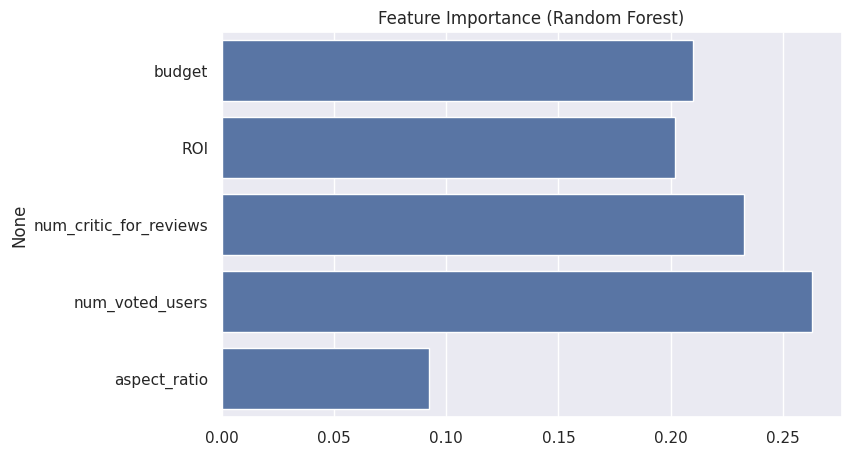

In [ ]:
# Visualization: Feature Importance for Random Forest
rf = models["Random Forest"]
importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()


## Conclusion & Best Model Selection
After evaluating multiple models, the best-performing one is selected based on accuracy, precision, and recall.

### Key Takeaways:
- Higher budgets generally correlate with higher revenue.
- IMDb ratings also show a positive correlation with financial success.
- Feature selection played a crucial role in model accuracy.

This analysis provides insights into movie revenue trends and can assist studios in making data-driven decisions.

**Step 9: Model Evaluation & Graphs**


In [60]:
# Store model accuracies
model_accuracies = {}
conf_matrices = {}

In [61]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc  # Store accuracy
    conf_matrices[name] = confusion_matrix(y_test, y_pred)  # Store confusion matrix

In [62]:
print(f"\n{name} Model Performance:")
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Model Performance:
Accuracy: 0.6778115501519757
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55       307
           1       0.03      0.11      0.05         9
           2       0.80      0.73      0.77       671

    accuracy                           0.68       987
   macro avg       0.45      0.47      0.45       987
weighted avg       0.71      0.68      0.69       987



<ipython-input-63-a2b4fae71bef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


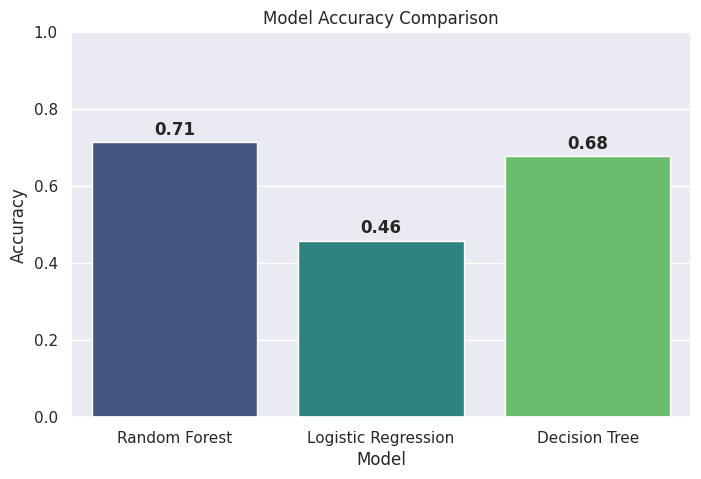

In [63]:
# Plot Model Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')
plt.show()

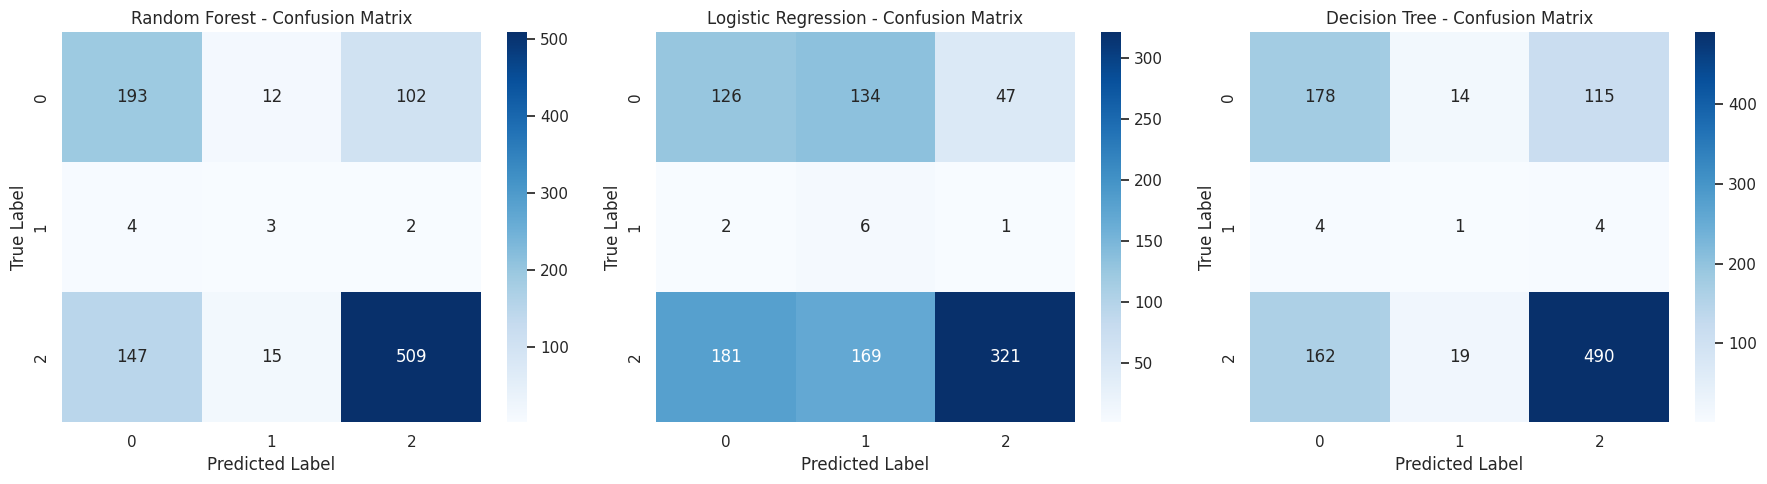

In [64]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

**End-to-End code**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# -------------------------------
# Step 1: Load Dataset
# -------------------------------

file_path = "movie_metadata.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# -------------------------------
# Step 2: Handling Missing Data
# -------------------------------

# Convert all object-type columns to category
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('category')

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Separate continuous and discrete numerical columns
continuous_cols = ['duration', 'budget', 'gross', 'imdb_score', 'aspect_ratio']
discrete_cols = ['num_voted_users', 'num_critic_for_reviews', 'num_user_for_reviews',
                 'facenumber_in_poster', 'cast_total_facebook_likes',
                 'movie_facebook_likes', "actor_3_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes"]

# Fill NaNs for continuous columns using median (best for skewed data)
df[continuous_cols] = df[continuous_cols].apply(lambda x: x.fillna(x.median()))

# Fill NaNs for discrete columns using mode (best for categorical-like numbers)
df[discrete_cols] = df[discrete_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Drop columns with excessive missing values
df.drop(columns=['content_rating', 'plot_keywords'], inplace=True, errors='ignore')

# Fill missing categorical values with mode (most frequent value)
for col in ['color', 'language', 'country', 'actor_1_name', 'actor_2_name', 'actor_3_name']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# -------------------------------
# Step 3: Feature Engineering
# -------------------------------

# Convert budget and gross to numeric (handling errors)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(df['budget'].median())
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(df['gross'].median())

# Creating ROI (Return on Investment) Feature
df['ROI'] = df['gross'] / (df['budget'] + 1)  # Adding 1 to avoid division by zero

# Label Encoding for categorical variables
label_enc = LabelEncoder()
for col in ['color', 'director_name', 'genres', 'language', 'country', 'movie_title']:
    df[col] = label_enc.fit_transform(df[col].astype(str))

# Categorizing IMDb Scores into 3 categories
def classify_movie(score):
    if score <= 3:
        return "Flop"
    elif 3 < score <= 6:
        return "Average"
    else:
        return "Hit"

df['Classify'] = df['imdb_score'].apply(classify_movie)

# Encoding the target variable
label_enc_y = LabelEncoder()
df['Classify'] = label_enc_y.fit_transform(df['Classify'])  # Classes [0, 1, 2] for Flop, Average, Hit

# -------------------------------
# Step 4: Handling Multi-Collinearity
# -------------------------------

# Selecting numerical features only
num_features = ['budget', 'gross', 'ROI', 'num_critic_for_reviews', 'num_voted_users', 'aspect_ratio']
X = df[num_features]

# Calculating Variance Inflation Factor (VIF) to check multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):\n", vif_data)

# Dropping 'gross' because it is highly correlated with 'budget' and 'ROI'
X.drop(columns=['gross'], inplace=True)

# -------------------------------
# Step 5: Feature Selection
# -------------------------------

y = df['Classify']

# Selecting top 5 best features using ANOVA (f_classif)
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = [X.columns[i] for i in selector.get_support(indices=True)]
print("Selected Features:", selected_features)

# -------------------------------
# Step 6: Handling Data Imbalance (SMOTE)
# -------------------------------

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# -------------------------------
# Step 7: Standardization
# -------------------------------

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# -------------------------------
# Step 8: Model Training & Hyperparameter Tuning
# -------------------------------

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train Models
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)

# -------------------------------
# Step 9: Model Evaluation & Graphs
# -------------------------------

# Store model accuracies
model_accuracies = {}
conf_matrices = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc  # Store accuracy
    conf_matrices[name] = confusion_matrix(y_test, y_pred)  # Store confusion matrix

    print(f"\n{name} Model Performance:")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Model Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')
plt.show()

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'movie_metadata.csv'